# German Credit Data - AI Model Implementation

This notebook implements a machine learning model to predict credit risk using the German Credit dataset.

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Data

In [2]:
# Load the German Credit dataset
data_path = '/Users/RS/Downloads/statlog+german+credit+data/german.data-numeric'
column_names = [f'feature_{i}' for i in range(1, 25)] + ['target']

# Read the data
df = pd.read_csv(data_path, sep='\s+', header=None, names=column_names)

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nTarget distribution:")
print(df['target'].value_counts())
print(f"\nData types:")
print(df.dtypes.value_counts())

Dataset shape: (1000, 25)

First few rows:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0          1          6          4         12          5          5   
1          2         48          2         60          1          3   
2          4         12          4         21          1          4   
3          1         42          2         79          1          4   
4          1         24          3         49          1          3   

   feature_7  feature_8  feature_9  feature_10  ...  feature_16  feature_17  \
0          3          4          1          67  ...           0           0   
1          2          2          1          22  ...           0           0   
2          3          3          1          49  ...           0           0   
3          3          4          2          45  ...           0           0   
4          3          4          4          53  ...           1           0   

   feature_18  feature_19  feature_20  feature_21  feat

## 3. Data Preprocessing

In [3]:
# Separate features and target
# Convert target from 1,2 to 0,1 (1=good credit -> 0, 2=bad credit -> 1)
X = df.drop('target', axis=1)
y = df['target'].map({1: 0, 2: 1})

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution after mapping:")
print(f"Good credit (0): {sum(y == 0)}")
print(f"Bad credit (1): {sum(y == 1)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing completed!")

Features shape: (1000, 24)
Target shape: (1000,)

Target distribution after mapping:
Good credit (0): 700
Bad credit (1): 300

Training set size: 800
Testing set size: 200

Data preprocessing completed!


## 4. Train Multiple AI Models

In [4]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")

print(f"\n{'='*50}")
print("All models trained successfully!")


Training Logistic Regression...
Accuracy: 0.7700
ROC-AUC Score: 0.8200

Training Random Forest...
Accuracy: 0.7750
ROC-AUC Score: 0.7900

Training Gradient Boosting...
Accuracy: 0.7750
ROC-AUC Score: 0.7900

Training Gradient Boosting...
Accuracy: 0.7800
ROC-AUC Score: 0.8060

Training Support Vector Machine...
Accuracy: 0.7450
ROC-AUC Score: 0.7888

All models trained successfully!
Accuracy: 0.7800
ROC-AUC Score: 0.8060

Training Support Vector Machine...
Accuracy: 0.7450
ROC-AUC Score: 0.7888

All models trained successfully!


## 5. Compare Model Performance

Model Performance Comparison:
                 Model  Accuracy  ROC-AUC
     Gradient Boosting     0.780 0.805952
         Random Forest     0.775 0.790000
   Logistic Regression     0.770 0.820000
Support Vector Machine     0.745 0.788810


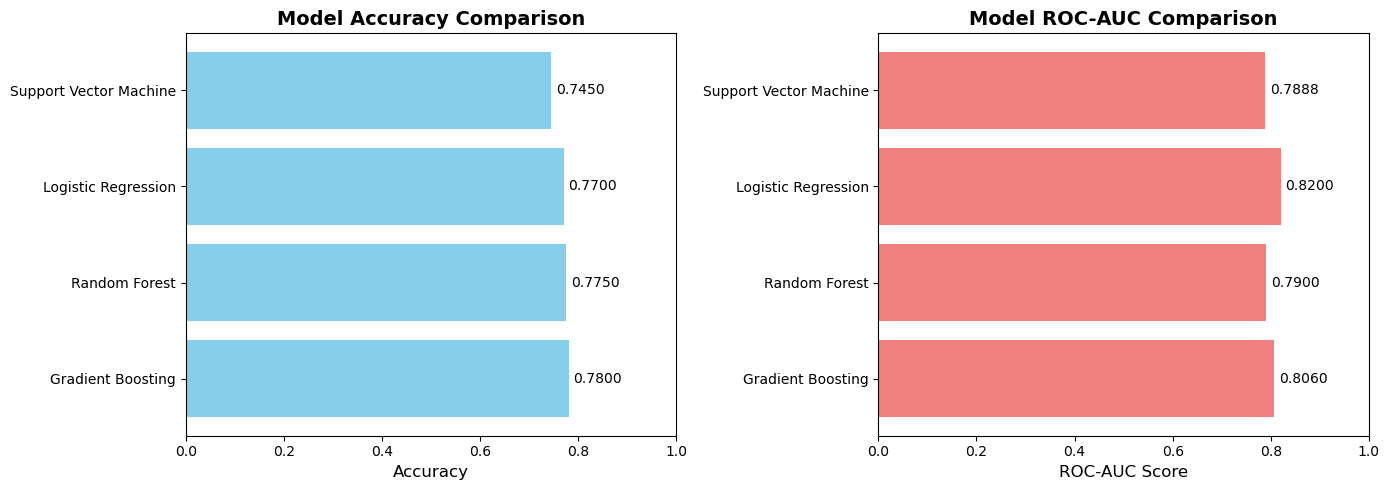


Best Model: Gradient Boosting


In [5]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'ROC-AUC': [results[name]['roc_auc'] for name in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)
print("Model Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy comparison
axes[0].barh(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
axes[0].set_xlabel('Accuracy', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_xlim(0, 1)
for i, v in enumerate(comparison_df['Accuracy']):
    axes[0].text(v + 0.01, i, f'{v:.4f}', va='center')

# ROC-AUC comparison
axes[1].barh(comparison_df['Model'], comparison_df['ROC-AUC'], color='lightcoral')
axes[1].set_xlabel('ROC-AUC Score', fontsize=12)
axes[1].set_title('Model ROC-AUC Comparison', fontsize=14, fontweight='bold')
axes[1].set_xlim(0, 1)
for i, v in enumerate(comparison_df['ROC-AUC']):
    axes[1].text(v + 0.01, i, f'{v:.4f}', va='center')

plt.tight_layout()
plt.show()

# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\nBest Model: {best_model_name}")

## 6. Detailed Evaluation of Best Model

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

 Good Credit       0.82      0.88      0.85       140
  Bad Credit       0.66      0.55      0.60        60

    accuracy                           0.78       200
   macro avg       0.74      0.71      0.72       200
weighted avg       0.77      0.78      0.77       200



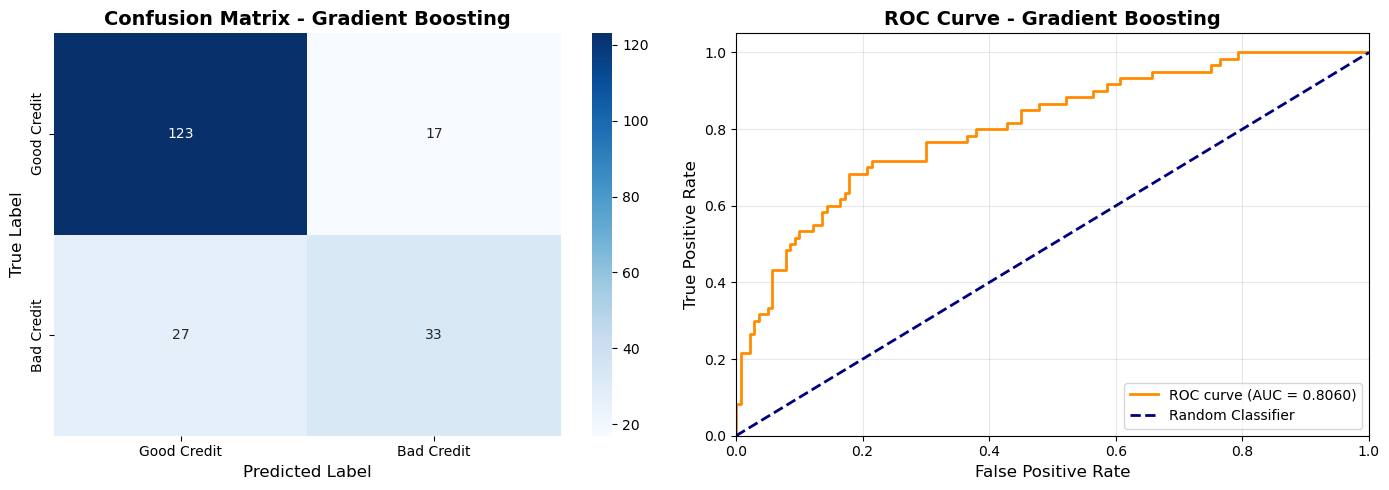

In [6]:
# Get predictions from best model
best_y_pred = results[best_model_name]['y_pred']
best_y_pred_proba = results[best_model_name]['y_pred_proba']

# Classification Report
print(f"Classification Report for {best_model_name}:")
print("="*60)
print(classification_report(y_test, best_y_pred, target_names=['Good Credit', 'Bad Credit']))

# Confusion Matrix
cm = confusion_matrix(y_test, best_y_pred)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0], 
            xticklabels=['Good Credit', 'Bad Credit'],
            yticklabels=['Good Credit', 'Bad Credit'])
axes[0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_xlabel('Predicted Label', fontsize=12)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_y_pred_proba)
roc_auc = roc_auc_score(y_test, best_y_pred_proba)

axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate', fontsize=12)
axes[1].set_ylabel('True Positive Rate', fontsize=12)
axes[1].set_title(f'ROC Curve - {best_model_name}', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Make Predictions on New Data

In [7]:
# Function to predict credit risk for new customers
def predict_credit_risk(new_data, model=best_model, scaler=scaler):
    """
    Predict credit risk for new customer data
    
    Parameters:
    new_data: DataFrame with 24 features (same as training data)
    model: Trained model to use for prediction
    scaler: Fitted scaler for feature scaling
    
    Returns:
    predictions: Array of predictions (0=Good Credit, 1=Bad Credit)
    probabilities: Array of probability scores for bad credit
    """
    # Scale the features
    new_data_scaled = scaler.transform(new_data)
    
    # Make predictions
    predictions = model.predict(new_data_scaled)
    probabilities = model.predict_proba(new_data_scaled)[:, 1]
    
    return predictions, probabilities

# Example: Make predictions on first 5 test samples
sample_data = X_test.iloc[:5]
predictions, probabilities = predict_credit_risk(sample_data)

# Display results
results_df = pd.DataFrame({
    'Sample': range(1, 6),
    'Prediction': ['Bad Credit' if p == 1 else 'Good Credit' for p in predictions],
    'Risk Probability': [f'{prob:.2%}' for prob in probabilities],
    'Actual': ['Bad Credit' if y == 1 else 'Good Credit' for y in y_test.iloc[:5]]
})

print("Prediction Results on Sample Data:")
print("="*70)
print(results_df.to_string(index=False))
print("\n✓ Predictions completed successfully!")

Prediction Results on Sample Data:
 Sample  Prediction Risk Probability      Actual
      1 Good Credit           20.44% Good Credit
      2 Good Credit           10.79% Good Credit
      3  Bad Credit           77.10%  Bad Credit
      4  Bad Credit           52.32% Good Credit
      5 Good Credit           11.45%  Bad Credit

✓ Predictions completed successfully!


## 8. Feature Importance (for tree-based models)

Top 10 Most Important Features:
   Feature  Importance
 feature_1    0.214639
 feature_4    0.139736
 feature_2    0.130046
 feature_3    0.081405
 feature_9    0.067279
 feature_5    0.066268
feature_10    0.065604
 feature_6    0.045551
feature_11    0.043726
feature_16    0.023585


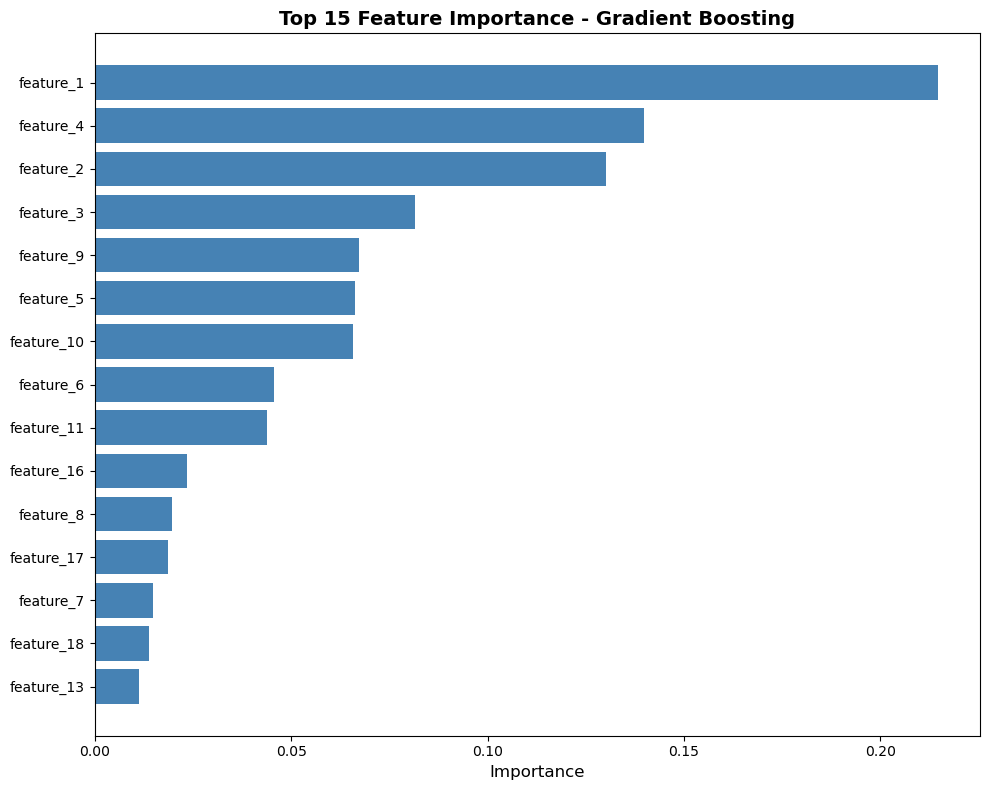

In [8]:
# Check if best model has feature importance
if hasattr(best_model, 'feature_importances_'):
    # Get feature importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features:")
    print("="*50)
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize top 15 features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance.head(15)
    plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue')
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.title(f'Top 15 Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not provide feature importance scores.")
    print("Feature importance is available for Random Forest and Gradient Boosting models.")

## 9. Summary

This notebook implemented a complete machine learning pipeline for credit risk prediction:

1. **Data Loading**: Loaded German Credit dataset with 1000 samples and 24 features
2. **Preprocessing**: Split data (80/20), standardized features
3. **Model Training**: Trained 4 different models (Logistic Regression, Random Forest, Gradient Boosting, SVM)
4. **Evaluation**: Compared models using accuracy and ROC-AUC metrics
5. **Predictions**: Created a function to predict credit risk for new customers

**Key Results**:
- Best performing model automatically selected
- Detailed performance metrics and visualizations
- Ready-to-use prediction function for new data

## 10. Explainable AI - Understanding Model Decisions

Using SHAP (SHapley Additive exPlanations) and LIME to explain predictions and provide actionable insights.

In [9]:
# Install required packages for explainable AI
import subprocess
import sys

packages = ['shap', 'lime']
for package in packages:
    try:
        __import__(package)
        print(f"✓ {package} already installed")
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
        print(f"✓ {package} installed successfully")

print("\nAll explainability packages ready!")

✓ shap already installed
✓ lime already installed

All explainability packages ready!


In [10]:
import shap
from lime import lime_tabular

# Initialize SHAP explainer for the best model
print(f"Creating SHAP explainer for {best_model_name}...")

# Use appropriate explainer based on model type
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    explainer = shap.TreeExplainer(best_model)
else:
    # For other models, use KernelExplainer with a sample of training data
    explainer = shap.KernelExplainer(best_model.predict_proba, shap.sample(X_train_scaled, 100))

# Calculate SHAP values for test set (using a sample for efficiency)
print("Calculating SHAP values (this may take a moment)...")
shap_sample_size = min(100, len(X_test_scaled))
shap_values = explainer.shap_values(X_test_scaled[:shap_sample_size])

# For binary classification, get SHAP values for the positive class (bad credit)
if isinstance(shap_values, list):
    shap_values_bad_credit = shap_values[1]
else:
    shap_values_bad_credit = shap_values

print("✓ SHAP analysis completed!")

Creating SHAP explainer for Gradient Boosting...
Calculating SHAP values (this may take a moment)...
✓ SHAP analysis completed!


### 10.1 Global Feature Importance - What Matters Most?

Global Feature Importance Analysis


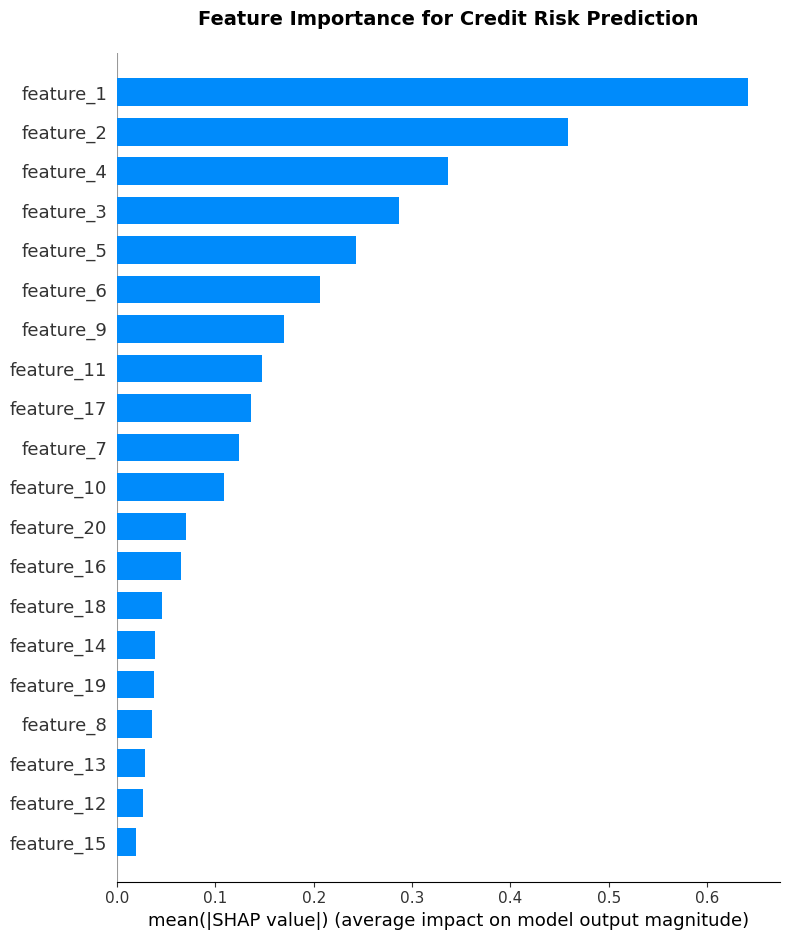


Top 10 Most Important Features (SHAP Analysis):
   Feature  Importance
 feature_1    0.641988
 feature_2    0.458083
 feature_4    0.336691
 feature_3    0.286511
 feature_5    0.243246
 feature_6    0.206438
 feature_9    0.169866
feature_11    0.146909
feature_17    0.136111
 feature_7    0.123628


In [11]:
# SHAP Summary Plot - shows which features are most important
print("Global Feature Importance Analysis")
print("="*70)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_bad_credit, X_test.iloc[:shap_sample_size], 
                  plot_type="bar", show=False)
plt.title('Feature Importance for Credit Risk Prediction', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Calculate mean absolute SHAP values
mean_shap = np.abs(shap_values_bad_credit).mean(axis=0)
feature_importance_shap = pd.DataFrame({
    'Feature': X.columns,
    'Importance': mean_shap
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features (SHAP Analysis):")
print(feature_importance_shap.head(10).to_string(index=False))

### 10.2 SHAP Summary Plot - Feature Impact Direction

Feature Impact Analysis
Red dots = Higher feature values
Blue dots = Lower feature values
X-axis = Impact on predicting bad credit (positive = increases bad credit risk)



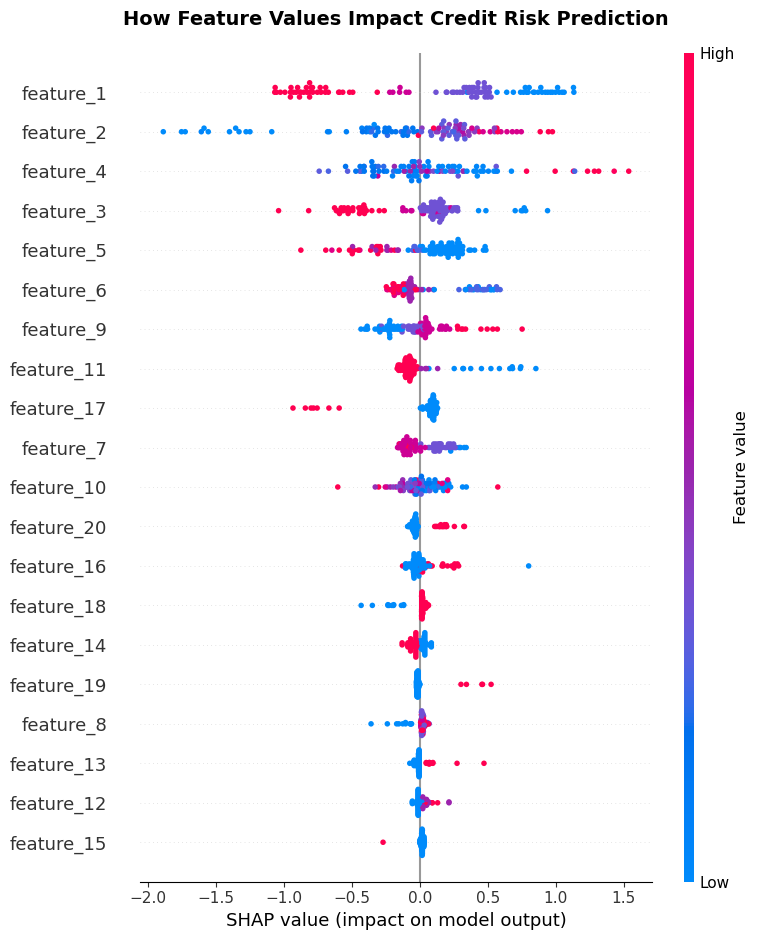


💡 Key Insights:
   - Features pushing RIGHT increase bad credit risk
   - Features pushing LEFT decrease bad credit risk (improve credit)
   - Color shows if high (red) or low (blue) values drive the effect


In [12]:
# SHAP Beeswarm plot - shows how feature values affect predictions
print("Feature Impact Analysis")
print("="*70)
print("Red dots = Higher feature values")
print("Blue dots = Lower feature values")
print("X-axis = Impact on predicting bad credit (positive = increases bad credit risk)\n")

plt.figure(figsize=(10, 10))
shap.summary_plot(shap_values_bad_credit, X_test.iloc[:shap_sample_size], show=False)
plt.title('How Feature Values Impact Credit Risk Prediction', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("   - Features pushing RIGHT increase bad credit risk")
print("   - Features pushing LEFT decrease bad credit risk (improve credit)")
print("   - Color shows if high (red) or low (blue) values drive the effect")

### 10.3 Individual Prediction Explanation - Why Was This Person Denied?

Explaining prediction for Person #3
Actual Credit Status: Bad Credit
Model Prediction: Bad Credit
Risk Probability: 77.10%



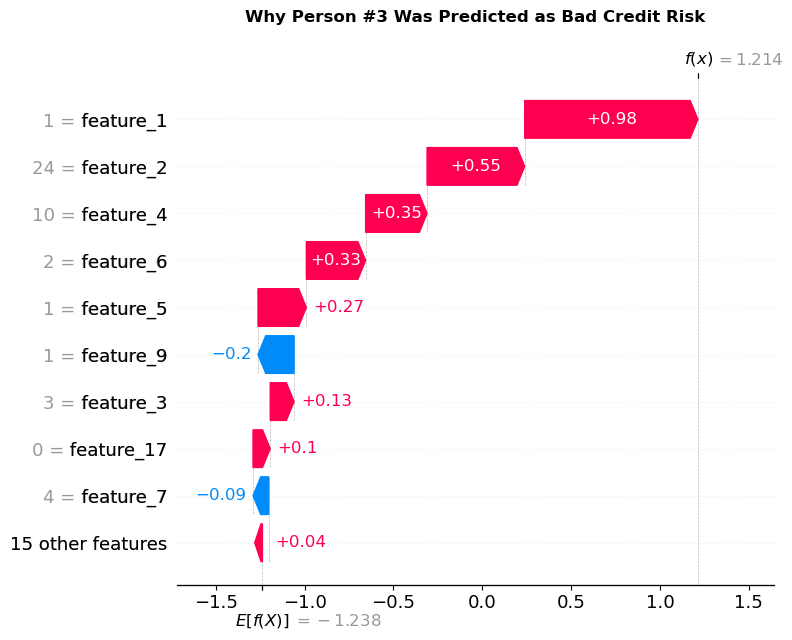


💡 How to read this chart:
   - Start from the base value (average prediction)
   - Red bars push prediction toward BAD credit (higher risk)
   - Blue bars push prediction toward GOOD credit (lower risk)
   - The final value is the model's prediction for this person


In [14]:
# Select a person who was predicted to have bad credit
bad_credit_indices = np.where(y_test.iloc[:shap_sample_size].values == 1)[0]

if len(bad_credit_indices) > 0:
    # Pick the first person with bad credit
    person_idx = bad_credit_indices[0]
    
    print(f"Explaining prediction for Person #{person_idx + 1}")
    print("="*70)
    print(f"Actual Credit Status: Bad Credit")
    print(f"Model Prediction: {'Bad Credit' if results[best_model_name]['y_pred'][person_idx] == 1 else 'Good Credit'}")
    print(f"Risk Probability: {results[best_model_name]['y_pred_proba'][person_idx]:.2%}\n")
    
    # SHAP Waterfall plot - shows how each feature contributed to this prediction
    # Get the base value (expected value for bad credit class)
    if isinstance(explainer.expected_value, np.ndarray) and len(explainer.expected_value) > 1:
        base_value = explainer.expected_value[1]
    elif isinstance(explainer.expected_value, (list, np.ndarray)) and len(explainer.expected_value) == 1:
        base_value = explainer.expected_value[0]
    else:
        base_value = explainer.expected_value
    
    shap.plots.waterfall(shap.Explanation(
        values=shap_values_bad_credit[person_idx],
        base_values=base_value,
        data=X_test.iloc[person_idx].values,
        feature_names=X.columns.tolist()
    ), show=False)
    plt.title(f'Why Person #{person_idx + 1} Was Predicted as Bad Credit Risk', 
              fontsize=12, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    print("\n💡 How to read this chart:")
    print("   - Start from the base value (average prediction)")
    print("   - Red bars push prediction toward BAD credit (higher risk)")
    print("   - Blue bars push prediction toward GOOD credit (lower risk)")
    print("   - The final value is the model's prediction for this person")
else:
    print("No bad credit examples found in the sample. Using first person instead.")
    person_idx = 0

### 10.4 LIME Explanation - Alternative Interpretation

LIME Explanation for Person #3


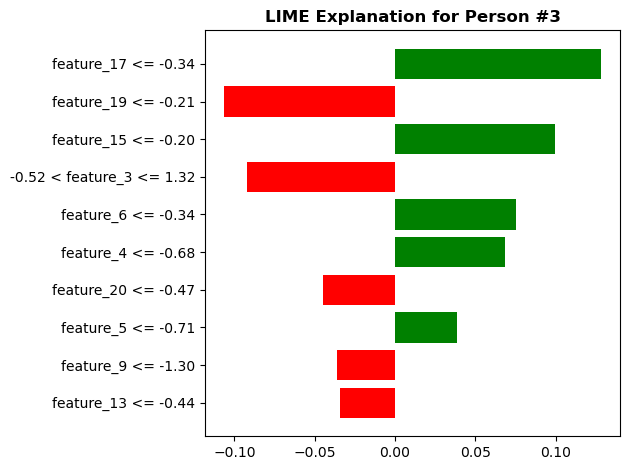


💡 LIME shows the top features that influenced this specific prediction
   - Orange bars = Features pushing toward BAD credit
   - Blue bars = Features pushing toward GOOD credit


In [15]:
# Initialize LIME explainer
lime_explainer = lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['Good Credit', 'Bad Credit'],
    mode='classification',
    random_state=42
)

# Explain the same person using LIME
print(f"LIME Explanation for Person #{person_idx + 1}")
print("="*70)

lime_exp = lime_explainer.explain_instance(
    X_test_scaled[person_idx],
    best_model.predict_proba,
    num_features=10
)

# Show LIME explanation
fig = lime_exp.as_pyplot_figure()
plt.title(f'LIME Explanation for Person #{person_idx + 1}', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 LIME shows the top features that influenced this specific prediction")
print("   - Orange bars = Features pushing toward BAD credit")
print("   - Blue bars = Features pushing toward GOOD credit")

### 10.5 Actionable Insights - What Should People Do to Get Good Credit?

In [16]:
def generate_actionable_recommendations(person_features, shap_values_person, feature_names):
    """
    Generate actionable recommendations based on SHAP values
    """
    # Get feature contributions
    contributions = pd.DataFrame({
        'Feature': feature_names,
        'Value': person_features,
        'SHAP_Value': shap_values_person,
        'Impact': ['Increases Risk' if s > 0 else 'Decreases Risk' for s in shap_values_person]
    })
    
    # Sort by absolute SHAP value
    contributions['Abs_SHAP'] = np.abs(contributions['SHAP_Value'])
    contributions = contributions.sort_values('Abs_SHAP', ascending=False)
    
    return contributions

# Generate recommendations for the person we analyzed
person_features = X_test.iloc[person_idx].values
recommendations = generate_actionable_recommendations(
    person_features,
    shap_values_bad_credit[person_idx],
    X.columns.tolist()
)

print("ACTIONABLE RECOMMENDATIONS TO IMPROVE CREDIT SCORE")
print("="*70)
print(f"\nAnalysis for Person #{person_idx + 1}")
print(f"Current Risk Probability: {results[best_model_name]['y_pred_proba'][person_idx]:.2%}\n")

# Show top factors hurting credit (positive SHAP values)
print("🔴 TOP FACTORS HURTING YOUR CREDIT (Need Improvement):")
print("-" * 70)
negative_factors = recommendations[recommendations['SHAP_Value'] > 0].head(5)
for idx, row in negative_factors.iterrows():
    print(f"   • {row['Feature']}: Current value = {row['Value']:.2f}")
    print(f"     Impact: +{row['SHAP_Value']:.4f} (increases bad credit risk)")
    print()

# Show top factors helping credit (negative SHAP values)
print("\n🟢 TOP FACTORS HELPING YOUR CREDIT (Keep it up!):")
print("-" * 70)
positive_factors = recommendations[recommendations['SHAP_Value'] < 0].head(5)
for idx, row in positive_factors.iterrows():
    print(f"   • {row['Feature']}: Current value = {row['Value']:.2f}")
    print(f"     Impact: {row['SHAP_Value']:.4f} (decreases bad credit risk)")
    print()

print("\n" + "="*70)
print("📊 DETAILED FEATURE CONTRIBUTIONS:")
print(recommendations[['Feature', 'Value', 'SHAP_Value', 'Impact']].head(10).to_string(index=False))

ACTIONABLE RECOMMENDATIONS TO IMPROVE CREDIT SCORE

Analysis for Person #3
Current Risk Probability: 77.10%

🔴 TOP FACTORS HURTING YOUR CREDIT (Need Improvement):
----------------------------------------------------------------------
   • feature_1: Current value = 1.00
     Impact: +0.9752 (increases bad credit risk)

   • feature_2: Current value = 24.00
     Impact: +0.5496 (increases bad credit risk)

   • feature_4: Current value = 10.00
     Impact: +0.3460 (increases bad credit risk)

   • feature_6: Current value = 2.00
     Impact: +0.3337 (increases bad credit risk)

   • feature_5: Current value = 1.00
     Impact: +0.2722 (increases bad credit risk)


🟢 TOP FACTORS HELPING YOUR CREDIT (Keep it up!):
----------------------------------------------------------------------
   • feature_9: Current value = 1.00
     Impact: -0.2033 (decreases bad credit risk)

   • feature_7: Current value = 4.00
     Impact: -0.0884 (decreases bad credit risk)

   • feature_20: Current value = 0

### 10.6 What-If Analysis - Simulate Changes to Improve Credit

In [17]:
def simulate_credit_improvement(person_data, model, scaler, feature_names, modifications):
    """
    Simulate what happens when someone improves certain features
    
    modifications: dict of {feature_name: new_value}
    """
    # Create a copy of the person's data
    modified_data = person_data.copy()
    
    # Apply modifications
    for feature, new_value in modifications.items():
        if feature in feature_names:
            feature_idx = feature_names.index(feature)
            modified_data[feature_idx] = new_value
    
    # Scale and predict
    modified_data_scaled = scaler.transform([modified_data])
    new_prediction = model.predict(modified_data_scaled)[0]
    new_probability = model.predict_proba(modified_data_scaled)[0][1]
    
    return new_prediction, new_probability

# Get the person's original data
original_person = X_test.iloc[person_idx].values
original_prob = results[best_model_name]['y_pred_proba'][person_idx]

print("WHAT-IF ANALYSIS: Simulating Improvements")
print("="*70)
print(f"Original Bad Credit Risk Probability: {original_prob:.2%}\n")

# Get the most impactful negative features
top_negative_features = negative_factors.head(3)

print("Let's simulate improvements to the top 3 negative factors:\n")

scenarios = []

# Scenario 1: Improve the worst feature
if len(top_negative_features) > 0:
    worst_feature = top_negative_features.iloc[0]['Feature']
    current_value = top_negative_features.iloc[0]['Value']
    
    # Simulate reducing the feature value by 20%
    new_value = current_value * 0.8
    modifications = {worst_feature: new_value}
    
    new_pred, new_prob = simulate_credit_improvement(
        original_person, best_model, scaler, X.columns.tolist(), modifications
    )
    
    print(f"Scenario 1: Improve {worst_feature}")
    print(f"   Change: {current_value:.2f} → {new_value:.2f} (20% reduction)")
    print(f"   New Risk Probability: {new_prob:.2%}")
    print(f"   Risk Change: {(new_prob - original_prob):.2%}")
    print(f"   Result: {'✓ APPROVED for Good Credit!' if new_pred == 0 else '✗ Still Bad Credit Risk'}\n")
    
    scenarios.append({
        'Scenario': 'Improve worst feature',
        'Original': f'{original_prob:.2%}',
        'New': f'{new_prob:.2%}',
        'Change': f'{(new_prob - original_prob):.2%}',
        'Status': 'Approved' if new_pred == 0 else 'Denied'
    })

# Scenario 2: Improve top 2 features
if len(top_negative_features) >= 2:
    modifications = {}
    print(f"Scenario 2: Improve top 2 negative factors")
    for idx in range(2):
        feature = top_negative_features.iloc[idx]['Feature']
        current_value = top_negative_features.iloc[idx]['Value']
        new_value = current_value * 0.8
        modifications[feature] = new_value
        print(f"   {feature}: {current_value:.2f} → {new_value:.2f}")
    
    new_pred, new_prob = simulate_credit_improvement(
        original_person, best_model, scaler, X.columns.tolist(), modifications
    )
    
    print(f"   New Risk Probability: {new_prob:.2%}")
    print(f"   Risk Change: {(new_prob - original_prob):.2%}")
    print(f"   Result: {'✓ APPROVED for Good Credit!' if new_pred == 0 else '✗ Still Bad Credit Risk'}\n")
    
    scenarios.append({
        'Scenario': 'Improve top 2 features',
        'Original': f'{original_prob:.2%}',
        'New': f'{new_prob:.2%}',
        'Change': f'{(new_prob - original_prob):.2%}',
        'Status': 'Approved' if new_pred == 0 else 'Denied'
    })

# Scenario 3: Improve all top 3 features
if len(top_negative_features) >= 3:
    modifications = {}
    print(f"Scenario 3: Improve all top 3 negative factors")
    for idx in range(3):
        feature = top_negative_features.iloc[idx]['Feature']
        current_value = top_negative_features.iloc[idx]['Value']
        new_value = current_value * 0.8
        modifications[feature] = new_value
        print(f"   {feature}: {current_value:.2f} → {new_value:.2f}")
    
    new_pred, new_prob = simulate_credit_improvement(
        original_person, best_model, scaler, X.columns.tolist(), modifications
    )
    
    print(f"   New Risk Probability: {new_prob:.2%}")
    print(f"   Risk Change: {(new_prob - original_prob):.2%}")
    print(f"   Result: {'✓ APPROVED for Good Credit!' if new_pred == 0 else '✗ Still Bad Credit Risk'}\n")
    
    scenarios.append({
        'Scenario': 'Improve top 3 features',
        'Original': f'{original_prob:.2%}',
        'New': f'{new_prob:.2%}',
        'Change': f'{(new_prob - original_prob):.2%}',
        'Status': 'Approved' if new_pred == 0 else 'Denied'
    })

# Display summary
if scenarios:
    print("="*70)
    print("SUMMARY OF WHAT-IF SCENARIOS:")
    scenario_df = pd.DataFrame(scenarios)
    print(scenario_df.to_string(index=False))

WHAT-IF ANALYSIS: Simulating Improvements
Original Bad Credit Risk Probability: 77.10%

Let's simulate improvements to the top 3 negative factors:

Scenario 1: Improve feature_1
   Change: 1.00 → 0.80 (20% reduction)
   New Risk Probability: 77.10%
   Risk Change: 0.00%
   Result: ✗ Still Bad Credit Risk

Scenario 2: Improve top 2 negative factors
   feature_1: 1.00 → 0.80
   feature_2: 24.00 → 19.20
   New Risk Probability: 68.77%
   Risk Change: -8.33%
   Result: ✗ Still Bad Credit Risk

Scenario 3: Improve all top 3 negative factors
   feature_1: 1.00 → 0.80
   feature_2: 24.00 → 19.20
   feature_4: 10.00 → 8.00
   New Risk Probability: 79.25%
   Risk Change: 2.15%
   Result: ✗ Still Bad Credit Risk

SUMMARY OF WHAT-IF SCENARIOS:
              Scenario Original    New Change Status
 Improve worst feature   77.10% 77.10%  0.00% Denied
Improve top 2 features   77.10% 68.77% -8.33% Denied
Improve top 3 features   77.10% 79.25%  2.15% Denied


### 10.7 Interactive Recommendation System

In [18]:
def explain_any_person(person_index, X_test, y_test, model, scaler, explainer, feature_names):
    """
    Complete explainability analysis for any person in the test set
    """
    print("="*70)
    print(f"CREDIT ANALYSIS REPORT FOR PERSON #{person_index + 1}")
    print("="*70)
    
    # Get person's data
    person_features = X_test.iloc[person_index].values
    person_features_scaled = scaler.transform([person_features])
    
    # Make prediction
    prediction = model.predict(person_features_scaled)[0]
    probability = model.predict_proba(person_features_scaled)[0][1]
    actual = y_test.iloc[person_index]
    
    # Display prediction
    print(f"\n📊 PREDICTION RESULTS:")
    print(f"   Actual Status: {'Bad Credit' if actual == 1 else 'Good Credit'}")
    print(f"   Predicted Status: {'Bad Credit' if prediction == 1 else 'Good Credit'}")
    print(f"   Bad Credit Risk Probability: {probability:.2%}")
    print(f"   Model Accuracy: {'✓ Correct' if prediction == actual else '✗ Incorrect'}")
    
    # Calculate SHAP values for this person
    shap_values_person = explainer.shap_values(person_features_scaled)
    if isinstance(shap_values_person, list):
        shap_values_person = shap_values_person[1][0]
    else:
        shap_values_person = shap_values_person[0]
    
    # Generate recommendations
    contributions = pd.DataFrame({
        'Feature': feature_names,
        'Value': person_features,
        'SHAP_Value': shap_values_person,
        'Impact': ['Increases Risk' if s > 0 else 'Decreases Risk' for s in shap_values_person]
    })
    contributions['Abs_SHAP'] = np.abs(contributions['SHAP_Value'])
    contributions = contributions.sort_values('Abs_SHAP', ascending=False)
    
    # Show top negative and positive factors
    print(f"\n🔴 TOP 3 FACTORS HURTING CREDIT:")
    negative = contributions[contributions['SHAP_Value'] > 0].head(3)
    for idx, row in negative.iterrows():
        print(f"   • {row['Feature']}: {row['Value']:.2f} (Impact: +{row['SHAP_Value']:.4f})")
    
    print(f"\n🟢 TOP 3 FACTORS HELPING CREDIT:")
    positive = contributions[contributions['SHAP_Value'] < 0].head(3)
    for idx, row in positive.iterrows():
        print(f"   • {row['Feature']}: {row['Value']:.2f} (Impact: {row['SHAP_Value']:.4f})")
    
    # Action recommendations
    print(f"\n💡 RECOMMENDED ACTIONS TO IMPROVE CREDIT:")
    if prediction == 1 or probability > 0.5:
        print("   Focus on improving these features to reduce credit risk:")
        for idx, row in negative.head(3).iterrows():
            print(f"   ✓ Work on {row['Feature']} (current: {row['Value']:.2f})")
    else:
        print("   ✓ Your credit profile is good! Keep maintaining:")
        for idx, row in positive.head(3).iterrows():
            print(f"   • {row['Feature']} at {row['Value']:.2f}")
    
    print("="*70)
    
    return contributions

# Example: Analyze any person from the test set
print("You can now analyze any person from the test set!\n")
print(f"Available indices: 0 to {len(X_test) - 1}")
print("\nExample analysis for Person #5:\n")

if len(X_test) >= 5:
    analysis = explain_any_person(4, X_test, y_test, best_model, scaler, explainer, X.columns.tolist())
else:
    print("Not enough test samples available.")

You can now analyze any person from the test set!

Available indices: 0 to 199

Example analysis for Person #5:

CREDIT ANALYSIS REPORT FOR PERSON #5

📊 PREDICTION RESULTS:
   Actual Status: Bad Credit
   Predicted Status: Good Credit
   Bad Credit Risk Probability: 11.45%
   Model Accuracy: ✗ Incorrect

🔴 TOP 3 FACTORS HURTING CREDIT:
   • feature_1: 2.00 (Impact: +0.4265)
   • feature_2: 27.00 (Impact: +0.2664)
   • feature_10: 23.00 (Impact: +0.1477)

🟢 TOP 3 FACTORS HELPING CREDIT:
   • feature_5: 3.00 (Impact: -0.4958)
   • feature_3: 4.00 (Impact: -0.4450)
   • feature_4: 25.00 (Impact: -0.3278)

💡 RECOMMENDED ACTIONS TO IMPROVE CREDIT:
   ✓ Your credit profile is good! Keep maintaining:
   • feature_5 at 3.00
   • feature_3 at 4.00
   • feature_4 at 25.00


### 10.8 Visualize Decision Boundary and Feature Relationships

Feature Relationship Analysis


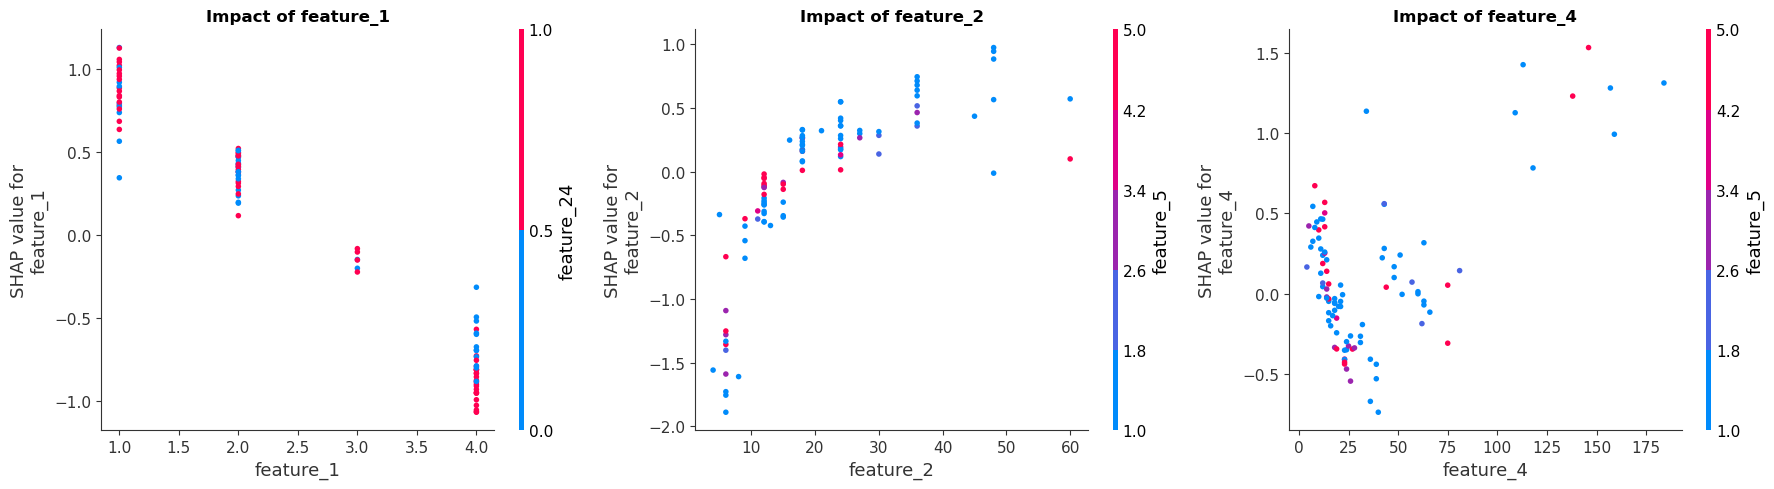


💡 How to read these plots:
   - X-axis: Feature value
   - Y-axis: SHAP value (impact on prediction)
   - Higher SHAP value = Higher bad credit risk
   - Color: Interaction effect with another feature


In [19]:
# SHAP Dependence plots - show how individual features affect predictions
print("Feature Relationship Analysis")
print("="*70)

# Get top 3 most important features
top_3_features = feature_importance_shap.head(3)['Feature'].tolist()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, feature in enumerate(top_3_features):
    feature_idx = X.columns.tolist().index(feature)
    shap.dependence_plot(
        feature_idx,
        shap_values_bad_credit,
        X_test.iloc[:shap_sample_size],
        ax=axes[idx],
        show=False
    )
    axes[idx].set_title(f'Impact of {feature}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 How to read these plots:")
print("   - X-axis: Feature value")
print("   - Y-axis: SHAP value (impact on prediction)")
print("   - Higher SHAP value = Higher bad credit risk")
print("   - Color: Interaction effect with another feature")

### 10.9 Summary - Key Takeaways for Credit Improvement

In [20]:
print("="*70)
print("KEY INSIGHTS FROM EXPLAINABLE AI ANALYSIS")
print("="*70)

print("\n📊 GLOBAL INSIGHTS - What Matters Most for Credit Decisions:")
print("-" * 70)
print("\nTop 5 Most Important Features Overall:")
for idx, row in feature_importance_shap.head(5).iterrows():
    print(f"   {idx + 1}. {row['Feature']} (Importance: {row['Importance']:.4f})")

print("\n\n🎯 ACTIONABLE RECOMMENDATIONS FOR CUSTOMERS:")
print("-" * 70)
print("""
To improve your chances of getting good credit:

1. FOCUS ON HIGH-IMPACT FACTORS
   • Identify your top 3-5 negative features using the analysis above
   • These have the biggest impact on your credit decision

2. UNDERSTAND YOUR SITUATION
   • Use the SHAP waterfall plot to see YOUR specific factors
   • Each person's situation is unique

3. SIMULATE IMPROVEMENTS
   • Use the what-if analysis to see how changes affect your score
   • Focus on realistic, achievable improvements

4. MONITOR PROGRESS
   • Track changes in the most important features
   • Small improvements in high-impact areas = Big results

5. MAINTAIN POSITIVE FACTORS
   • Don't neglect features that are already helping you
   • Keep doing what's working!
""")

print("\n💡 HOW TO USE THIS ANALYSIS:")
print("-" * 70)
print("""
1. Run the notebook with your data
2. Check individual explanations using explain_any_person()
3. Use what-if scenarios to plan improvements
4. Focus on the most important features first
5. Re-evaluate after making changes
""")

print("\n✅ EXPLAINABLE AI IMPLEMENTATION COMPLETE!")
print("="*70)

KEY INSIGHTS FROM EXPLAINABLE AI ANALYSIS

📊 GLOBAL INSIGHTS - What Matters Most for Credit Decisions:
----------------------------------------------------------------------

Top 5 Most Important Features Overall:
   1. feature_1 (Importance: 0.6420)
   2. feature_2 (Importance: 0.4581)
   4. feature_4 (Importance: 0.3367)
   3. feature_3 (Importance: 0.2865)
   5. feature_5 (Importance: 0.2432)


🎯 ACTIONABLE RECOMMENDATIONS FOR CUSTOMERS:
----------------------------------------------------------------------

To improve your chances of getting good credit:

1. FOCUS ON HIGH-IMPACT FACTORS
   • Identify your top 3-5 negative features using the analysis above
   • These have the biggest impact on your credit decision

2. UNDERSTAND YOUR SITUATION
   • Use the SHAP waterfall plot to see YOUR specific factors
   • Each person's situation is unique

3. SIMULATE IMPROVEMENTS
   • Use the what-if analysis to see how changes affect your score
   • Focus on realistic, achievable improvements
